<a href="https://drive.google.com/file/d/19loItlQRz6NYBOd09wP7S9vW77MKd3VQ/view?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clustering Methods**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.datasets import make_moons
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as hc

## K-Means Clustering

K-Means is a popular clustering algorithm suitable for a wide array of data clustering tasks. It's a centroid-based algorithm, where the goal is to minimize the distance between points in a cluster with their centroid.

### Mathematical Formulation

The objective of K-Means is to minimize the inertia or within-cluster sum-of-squares criterion:

$$ \sum_{i=1}^{n}\min_{\mu_j \in C}(||x_i - \mu_j||^2) $$

Where $\mu_j$ represents the centroid of cluster $C_j$.

### Parameters of K-Means

- **n_clusters**: The number of clusters and centroids to form.
- **max_iter**: Maximum number of iterations of the K-Means algorithm for a single run.
- **n_init**: Number of time the K-Means algorithm will be run with different centroid seeds.

### Using K-Means with sklearn

#### Blobs


We'll use a dataset generated with `make_blobs`, a simple tool to create clusters of data.

In [ ]:
def plot_2d_data(X):
    plt.figure(figsize=(8, 8))
    plt.scatter(X[:, 0], X[:, 1], s=50, edgecolors='black')
    plt.title('Data')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

def plot_results_knn(X, y_pred, colors, centers):
    plt.figure(figsize=(8, 8))
    for i in range(len(colors)):
        plt.scatter(X[y_pred == i, 0], X[y_pred == i, 1], s=50, color=colors[i], edgecolor='black', label=f'Cluster {i+1}', alpha=0.4)
    for i, center in enumerate(centers):
        plt.scatter(center[0], center[1], s=300, color=colors[i], marker='*', edgecolor='black', label=f'Center {i+1}')
    plt.title('K-Means Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()


In [ ]:
# Create a sample dataset using make_blobs
X_blobs, y_blobs = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plot_2d_data(X_blobs)

In [ ]:
# Apply K-Means algorithm
kmeans = KMeans(n_clusters=4, n_init=10, max_iter=300, random_state=42)
kmeans.fit(X_blobs)
y_kmeans = kmeans.predict(X_blobs)

In [ ]:
# Define colors for each cluster
colors = ['blue', 'green', 'orange', 'purple']
centers = kmeans.cluster_centers_

plot_results_knn(X_blobs, y_kmeans, colors, kmeans.cluster_centers_)

In [ ]:
# Label matching
confusion = confusion_matrix(y_blobs, y_kmeans)
rows, cols = linear_sum_assignment(confusion, maximize=True)
new_labels = np.zeros_like(y_kmeans)

for row, col in zip(rows, cols):
    new_labels[y_kmeans == col] = row

print(classification_report(y_blobs, new_labels))

#### Moons

Previous example is a simple dataset, but what if the data is not linearly separable? We can use `make_moons` to create a dataset with two interleaving half circles.

In [ ]:
# Create a sample dataset using make_moons
X_moon, y_moon = make_moons(n_samples=300, noise=0.1, random_state=0)
plot_2d_data(X_moon)

Let's see how K-Means performs on these datasets.

In [ ]:
# Apply K-Means algorithm
kmeans = KMeans(n_clusters=2, n_init=10, max_iter=300, random_state=42)
kmeans.fit(X_moon)
y_kmeans = kmeans.predict(X_moon)

In [ ]:
# Define colors for each cluster
colors = ['blue', 'red']
centers = kmeans.cluster_centers_
plot_results_knn(X_moon, y_kmeans, colors, centers)

#### How to determine the number of clusters?

In real-world scenarios, the number of clusters is not always known. In such cases, we can use the `Elbow` method to determine the optimal number of clusters. The `Elbow` method is a heuristic method that helps to find the optimal number of clusters by plotting the explained variance as a function of the number of clusters. The optimal number of clusters is the point where the explained variance starts to decrease in a linear fashion. The following code demonstrates how to use the `Elbow` method to determine the optimal number of clusters:

In [ ]:
# Calculate the sum of squared distances of samples to their closest cluster center
sse = []
for k in range(1, 11):  # Test 1 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    kmeans.fit(X_blobs)
    sse.append(kmeans.inertia_)  # Inertia: Sum of squared distances of samples to their closest cluster center

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances (SSE)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

Wee see that after 4 clusters, the explained variance starts to decrease linearly. Hence, the optimal number of clusters is 4. Let's visualize it!

In [ ]:
plt.figure(figsize=(8, 8))
for i, k in enumerate(range(2, 11)):
    plt.subplot(3, 3, i+1)
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    kmeans.fit(X_blobs)
    y_kmeans = kmeans.predict(X_blobs)
    # Plotting the clusters
    for j in range(k):
        plt.scatter(X_blobs[y_kmeans == j, 0], X_blobs[y_kmeans == j, 1], s=50, edgecolor='black', alpha=0.4, label=f'Cluster {j+1}')
    # Plotting the centers
    centers = kmeans.cluster_centers_
    for j, center in enumerate(centers):
        plt.scatter(center[0], center[1], s=300, color='red', marker='*', edgecolor='black', label=f'Center {j+1}')
    plt.title(f'K-Means Clustering (k={k})')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

## DBSCAN Clustering

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular clustering algorithm that groups together points that are closely packed together. It's a density-based algorithm that groups together points that are closely packed together and marks points in low-density regions as outliers.

### Parameters of DBSCAN

The DBSCAN algorithm groups together closely packed points by defining two parameters: `eps` and `min_samples`.

- `eps`: The maximum distance between two samples for one to be considered as in the neighborhood of the other.
- `min_samples`: The number of samples in a neighborhood for a point to be considered as a core point.

In [ ]:
def plot_dbscan(X, y_dbscan):
    plt.figure(figsize=(8, 8))
    for i in np.unique(y_dbscan):
        if i == -1:
            plt.scatter(X[y_dbscan == i, 0], X[y_dbscan == i, 1], s=50, label=f'Noise', alpha=0.8, marker='x')
            continue
        plt.scatter(X[y_dbscan == i, 0], X[y_dbscan == i, 1], s=50, edgecolor='black', label=f'Cluster {i}', alpha=0.8)
    plt.title('DBSCAN Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.show()

### Blobs

In [ ]:
centers = [[-10, -5], [7, 0], [8, 10]]
X, y = make_blobs(n_samples=50, centers=centers, cluster_std=0.8, random_state=42)
plot_2d_data(X)

Let's see how DBSCAN performs on the `blobs` dataset with default parameters.

In [ ]:
dbscan = DBSCAN()
y_dbscan = dbscan.fit_predict(X)
plot_dbscan(X, y_dbscan)


Let's plot the epsilon graph to determine the optimal value of epsilon. The default value of `eps` is 0.5 and the default value of `min_samples` is 5.

In [ ]:
def plot_dbscan_results_with_epsilon(X, y_dbscan, eps=None):
    plt.figure(figsize=(8, 8))
    if eps is not None:
        for point in X:
            circle = plt.Circle(point, eps, color='gray', fill=False)
            plt.gca().add_artist(circle)
    for i in np.unique(y_dbscan):
        if i == -1:
            plt.scatter(X[y_dbscan == i, 0], X[y_dbscan == i, 1], s=50, label=f'Noise', alpha=0.8, marker='x')
            continue
        plt.scatter(X[y_dbscan == i, 0], X[y_dbscan == i, 1], s=50, edgecolor='black', label=f'Cluster {i}', alpha=0.8)
    plt.title(f'DBSCAN Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.show()

plot_dbscan_results_with_epsilon(X, y_dbscan, eps=0.5)

We see that the `eps` value is too small, so we need to increase it. Let's set `eps` to 1.2.

In [ ]:
eps = 1.2

dbscan = DBSCAN(eps=eps)
y_dbscan = dbscan.fit_predict(X)
plot_dbscan_results_with_epsilon(X, y_dbscan, eps)


### Moons

K-means is not suitable for the `moons` dataset as it is not linearly separable. Let's see how DBSCAN performs on the `moons` dataset.

In [ ]:
# Create a sample dataset using make_moons
X, y = make_moons(n_samples=300, noise=0.1, random_state=0)
plot_2d_data(X)

In [ ]:
# Apply DBSCAN algorithm
dbscan = DBSCAN(eps=0.16, min_samples=4)
y_dbscan = dbscan.fit_predict(X)

plot_dbscan_results_with_epsilon(X, y_dbscan)

## Hierarchical Clustering

Hierarchical clustering is a unsupervised machine learning algorithm, which is used to group the unlabeled datasets into a cluster and also known as hierarchical cluster analysis or HCA.
In this algorithm, we develop the hierarchy of clusters in the form of a tree, and this tree-shaped structure is known as the **dendrogram**.


#### There are mainly two types of hierarchical clustering:

*  Agglomerative hierarchical clustering

*  Divisive Hierarchical clustering

### Agglomerative hierarchical clustering

It's a Bottom to Up approach clustering technique. In this initially we assign each points to be a individual clusters.

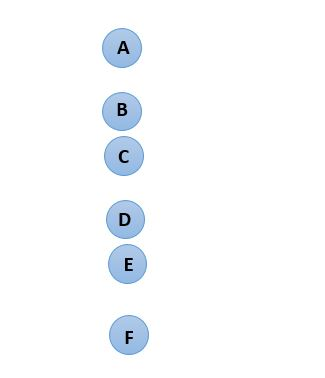

Then, at each iteration, we marge the closest pair of clusters and repeat this step until only a single cluster is left. Since at each step we merge the closest clusters. So, it's also known as **additive hierarchical clustering.**

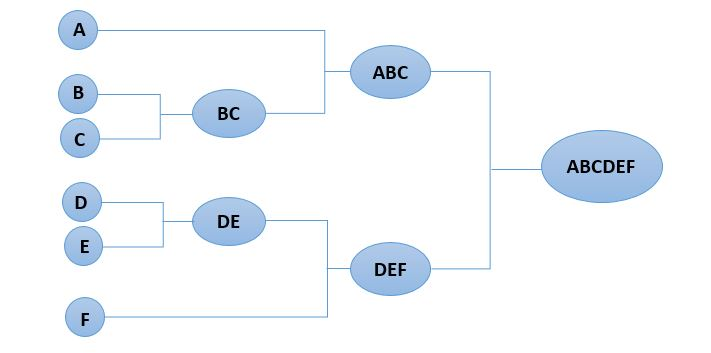

### Divisive Hierarchical clustering
It's a Top to Down Approach clustering technique. It work in opposite way. Instead of starting with 'n' clusters, it start with a single cluster Containing all points.

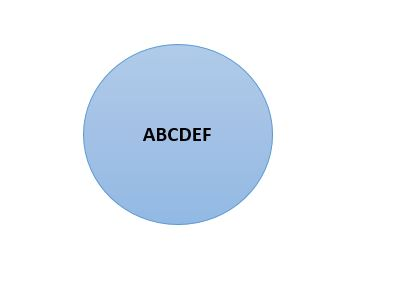

At each iteration, we split the farthest point in the cluster and repeat this process until each cluster only contains a single point.We are splitting (or dividing) the clusters at each step, hence the name divisive hierarchical clustering.

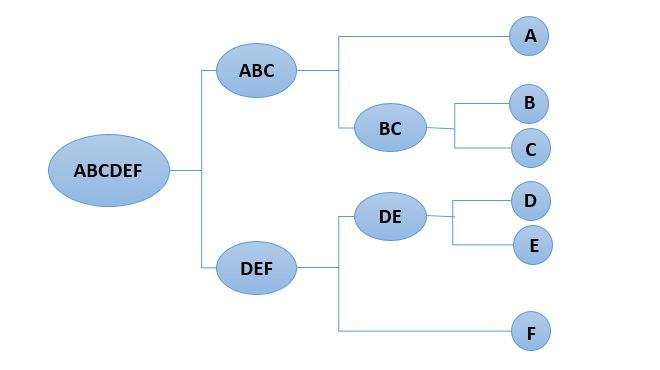

### **Proximity matrix**

Proximity matrix is a square matrix of shape n X n where n is a number of obsevations. It contains the distance of each points from each other points. We use Euclidean distance formula to calculate the distance.



### **Steps to Perform Hierarchical Clustring**

 To understanding the working process of Hierarchical Clustring, Let's take an sample of 5 Students.

 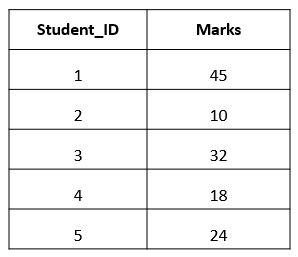

### **<u>Step1:</u>** First, we assign all points as a individual clusters.

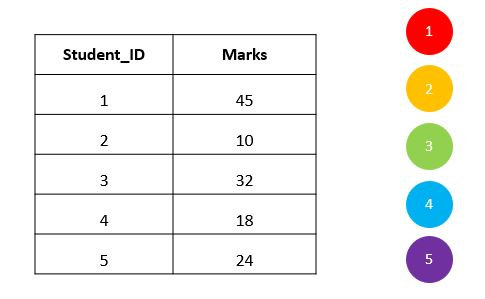

### <u>Step2:</u> We create proximity matrix of the given dataset.

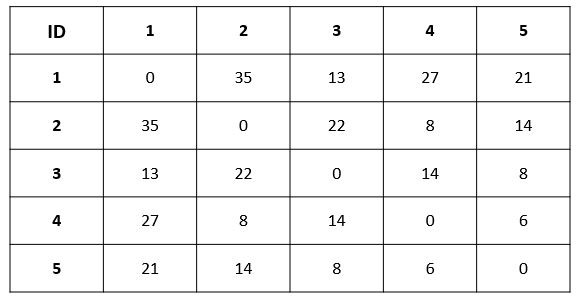

### **<u>Step3 :</u>** We merge the points that have smallest distance.

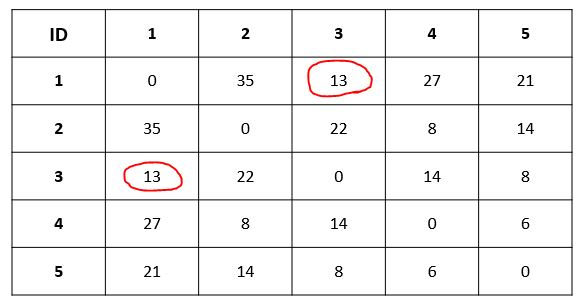

Here, is an updated clusters and we update the proximity matrix:

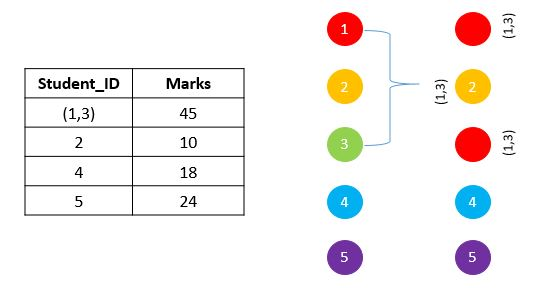

In updated proximity matrix we have taken the maximum of the two marks (45, 32) to replace the marks for (1,2) cluster.

**Now, we will again calculate the proximity matrix for these clusters:**

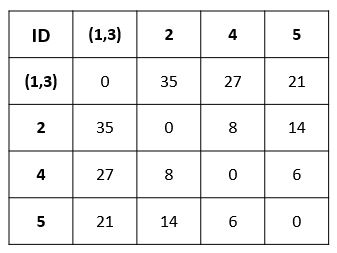

### <u>Step4:</u> We will repeat step 3 until only a single cluster is left.

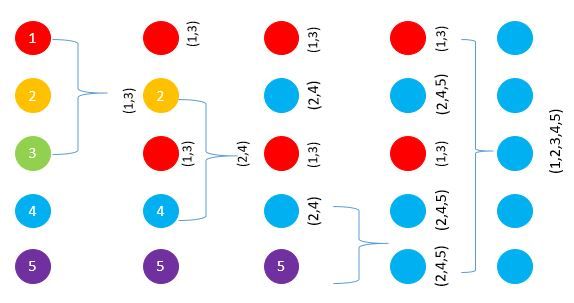

# **Linkages**

Linkage is a method of finding distance between two points. There are four Linkages in Hierarchical Clustering:
* Single Linkage
* Complete Linkage
* Average Linkage
* Ward Linkage

### <u>Single Linkage :</u>
In Single Linkage, the distance between two clusters is measured from the closest point in both clusters.

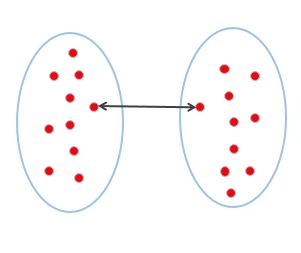

### <u>Complete Linkage : </u>
In Complete Linkage, the distance between two clusters is measured from the farest point in both clusters.

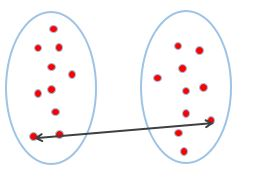

### <u>Average Linkage : </u>
In average linkage hierarchical clustering, the distance between two clusters is defined as the average distance between each point in one cluster to every point in the other cluster.

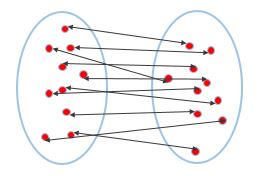

 ### <u>Ward Linkage : </u>
In ward Linkage, the distance is calculated in the same way as Average linkage, the different is that it calculate the sum of the square of the distances from each points in one cluster from outer cluster's points.


**Linkages and Patters Detected ::** https://scikit-learn.org/stable/modules/clustering.html

<img src='https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png' width=900>

# **Implementation of Hierarchical Clustering on Mall_Customers Dataset**

In [ ]:
dataset = pd.read_csv('./datasets/Mall_Customers.csv')

## Dataset Inspection

In [ ]:
dataset.head()

In [ ]:
dataset.shape

In [ ]:
dataset.info()

In [ ]:
dataset.describe().T

#### We take only two Features (Annual Income and Spending Score) to classify customer type.

In [ ]:
X = dataset.iloc[:, 3:]
X.head()

In [ ]:
plt.figure(figsize=(12, 6))
# Using Dendogram to find the optimal number of clusters
dendogram  = hc.dendrogram(hc.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
# make xitciks smaller
plt.xticks(fontsize=3)
plt.show()

### <u>Dendrogram</u>
Dendrogram is a graphical representation of Hierarchical Clustering. More the vertical length of line in dendogram, more the distance between the clusters.
dendogram is help in finding the number of clusters. We set a threshold distance and draw a horizontal line.Then the number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold.

In [ ]:
plt.figure(figsize=(12, 8))
dendogram  = hc.dendrogram(hc.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(200, c='r', linestyle='--')
plt.xticks(fontsize=3)
plt.show()

Here's the number of Cluster is (n_clusters) = 5

### Using Agglomerative hierarchical clustering Approch

In [ ]:
# Fitting hierarchical clustering to the mall dataset
hc_Agg = AgglomerativeClustering(n_clusters=5, linkage='ward')
y_hc = hc_Agg.fit_predict(X)

In [5]:
# Visualizing the clusters
clusters = [
    {"name": "Careful", "color": "red"},
    {"name": "Standard", "color": "blue"},
    {"name": "Target", "color": "green"},
    {"name": "Careless", "color": "cyan"},
    {"name": "Sensible", "color": "magenta"},
]

plt.figure(figsize=(12, 8))
for idx, cluster in enumerate(clusters):
    plt.scatter(X.iloc[y_hc == idx, 0], X.iloc[y_hc == idx, 1],
                s=100, c=cluster["color"], label=cluster["name"],
                edgecolor='black', alpha=0.6)

plt.title("Clusters of customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

NameError: name 'plt' is not defined

### In 90% Cases Result of Both hierarchical clustering technique is same.

## **Pros :**

The Optimal number of clusters can be obtained by the model itself, practical visualisation with the dendrogram

## **Cons :**

It is Not Appropriate for Datasets that have large number of Records.

таблица с баллами

In [4]:
import pandas as pd
from sklearn.cluster import KMeans

# Загрузка данных из CSV файла
data = pd.read_csv('./datasets/Table.csv',decimal=',')

first_row = data.iloc[0]
data = data.iloc[1:]

# Удаление возможных нечисловых значений и замена запятых на точки для корректного преобразования в float
data.replace(',', '.', regex=True, inplace=True)


# Преобразование данных в числовой формат, замена нечисловых значений на 0
columns_to_use = ['Unnamed: 10', 'Unnamed: 13', 'Unnamed: 24', 'Unnamed: 28', 'Pandas', 'kNN', 'Clustering']
data[columns_to_use] = data[columns_to_use].apply(pd.to_numeric, errors='coerce').fillna(0)

# Суммирование баллов
data['Total Score'] = data[columns_to_use].sum(axis=1)

# Подготовка данных для кластеризации
X = data[['Total Score']].values

# Кластеризация с помощью K-means на 3 группы
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
data['Cluster'] = kmeans.labels_

# Вывод первых нескольких строк обработанных данных
print(data[['Unnamed: 10', 'Unnamed: 13', 'Unnamed: 24', 'Unnamed: 28', 'Pandas', 'kNN', 'Clustering', 'Total Score', 'Cluster']])



c:\Users\mi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


    Unnamed: 10  Unnamed: 13  Unnamed: 24  Unnamed: 28  Pandas  kNN  \
1           5.0          2.0          7.0          0.0     1.0  0.0   
2           2.5          2.0          3.0          1.0     1.0  1.0   
3           6.0          2.0          7.0          1.0     1.0  1.0   
4           0.0          0.0          0.0          1.0     0.0  0.0   
5           5.0          2.0          7.0          1.0     1.0  1.0   
6           6.0          2.0          7.0          1.0     1.0  1.0   
7           5.0          2.0          7.0          1.0     1.0  1.0   
8           4.5          2.0          6.5          1.0     0.0  0.0   
9           5.5          2.0          7.0          1.0     1.0  1.0   
10          5.0          2.0          8.0          1.0     1.0  1.0   
11          6.0          0.0          0.0          1.0     0.0  0.0   
12          4.5          2.0          6.0          1.0     1.0  0.0   
13          5.0          2.0          7.5          1.0     1.0  1.0   
14    

In [12]:
import pandas as pd
from sklearn.cluster import KMeans

data = pd.read_csv('./datasets/Table.csv',decimal=',')

first_row = data.iloc[0]
data = data.iloc[1:]

data.replace(',', '.', regex=True, inplace=True)
data = data.fillna(-1)

columns_to_use = ['Unnamed: 10', 'Unnamed: 13', 'Unnamed: 24', 'Unnamed: 28', 'Pandas', 'kNN', 'Clustering']
data[columns_to_use] = data[columns_to_use].apply(pd.to_numeric, errors='coerce').fillna(0)

data['Total Score'] = data[columns_to_use].sum(axis=1)

X = data[['Total Score']].values

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
data['Cluster'] = kmeans.labels_

# Вывод первых нескольких строк обработанных данных
print(data[['Unnamed: 10', 'Unnamed: 13', 'Unnamed: 24', 'Unnamed: 28', 'Pandas', 'kNN', 'Clustering', 'Total Score', 'Cluster']])


c:\Users\mi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


    Unnamed: 10  Unnamed: 13  Unnamed: 24  Unnamed: 28  Pandas  kNN  \
1           5.0          2.0          7.0            0       1 -1.0   
2           2.5          2.0          3.0            1       1  1.0   
3           6.0          2.0          7.0            1       1  1.0   
4           0.0          0.0          0.0            1      -1 -1.0   
5           5.0          2.0          7.0            1       1  1.0   
6           6.0          2.0          7.0            1       1  1.0   
7           5.0          2.0          7.0            1       1  1.0   
8           4.5          2.0          6.5            1      -1 -1.0   
9           5.5          2.0          7.0            1       1  1.0   
10          5.0          2.0          8.0            1       1  1.0   
11          6.0          0.0          0.0            1      -1 -1.0   
12          4.5          2.0          6.0            1       1 -1.0   
13          5.0          2.0          7.5            1       1  1.0   
14    

In [14]:
print(data[['Student', 'Cluster']])

                          Student  Cluster
1         Агаева Эмилия Назимовна        0
2         Бауман Артём Георгиевич        2
3             Вехов Иван Олегович        0
4         Егоров Кирилл Сергеевич        1
5      Килимчук Иван Вячеславович        0
6         Кираев Булат Рустамович        0
7           Козлов Глеб Денисович        0
8        Корнийчук Павел Павлович        2
9    Мирошниченко Никита Игоревич        0
10      Родионова Мария Романовна        0
11        Садыков Артур Маратович        1
12        Сёмин Михаил Максимович        2
13  Циберева Елизавета Кирилловна        0
14        Яранцев Егор Евгеньевич        2
15              Бакланов Владимир        1
16              Виноградова Мария        0
17                   Гладков Иван        0
18            Горностаев Геннадий        1
19                 Дручук Георгий        0
20                  Зайцев Даниил        0
21           Караваева Александра        0
22                 Малышев Максим        0
23         

0 - зачет автоматом, 2 - на зачет, 1 - без зачета видимо:(